In [18]:
from sklearn import tree
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Data

In [19]:
df = pd.read_csv("heart.csv")

In [20]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Plot something for fun 🙂

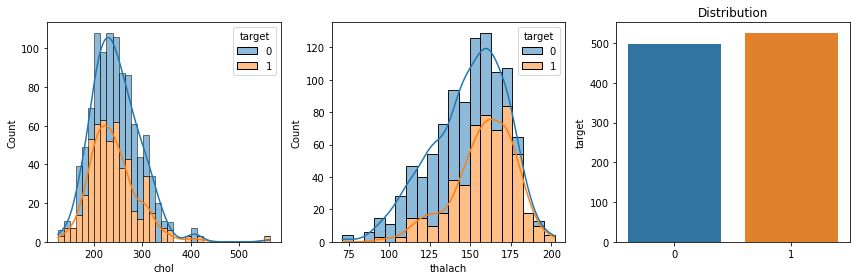

In [34]:

f, axes = plt.subplots(1, 3, figsize=(12, 4))
sns.histplot(data=df, x='chol', hue='target', multiple='stack', ax=axes[0], kde=True)
sns.histplot(data=df, x='thalach', hue='target', multiple='stack', ax=axes[1], kde=True)
sns.barplot(y=df.target.value_counts(sort=False), x=list(set(df.target.to_numpy())), ax=axes[2]).set(title='Distribution')
f.tight_layout()

In [35]:
df.target.value_counts(sort=False)

0    499
1    526
Name: target, dtype: int64

# Train, Test Split

In [21]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [23]:
X_train

array([[59.,  1.,  1., ...,  2.,  0.,  2.],
       [58.,  1.,  0., ...,  1.,  3.,  3.],
       [44.,  0.,  2., ...,  1.,  1.,  2.],
       ...,
       [51.,  1.,  0., ...,  2.,  0.,  3.],
       [43.,  1.,  0., ...,  2.,  0.,  3.],
       [52.,  1.,  0., ...,  2.,  1.,  2.]])

In [24]:
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Using Gini Index

In [25]:
classifier_gini = tree.DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=10)
classifier_gini.fit(X_train_normalized, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)

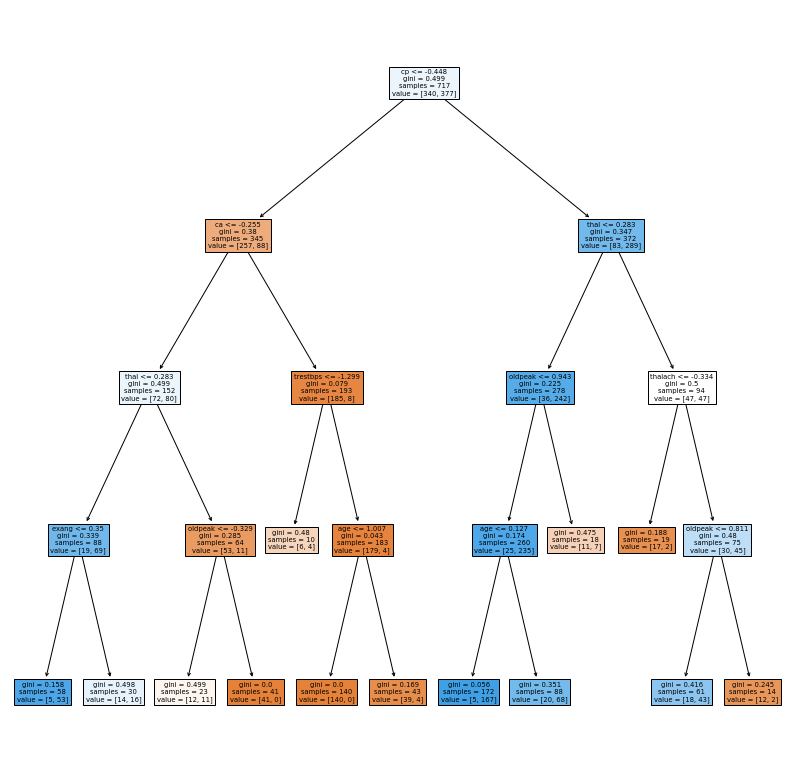

In [26]:
fig, ax = plt.subplots(figsize=(14, 14))
tree.plot_tree(classifier_gini, ax=ax, feature_names=list(df.columns), filled=True)
plt.show()

In [27]:
y_pred = classifier_gini.predict(X_test_normalized)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8084415584415584


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80       159
           1       0.76      0.88      0.82       149

    accuracy                           0.81       308
   macro avg       0.81      0.81      0.81       308
weighted avg       0.82      0.81      0.81       308



# Using Entropy

In [29]:
classifier_entropy = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=10)
classifier_entropy.fit(X_train_normalized, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=10)

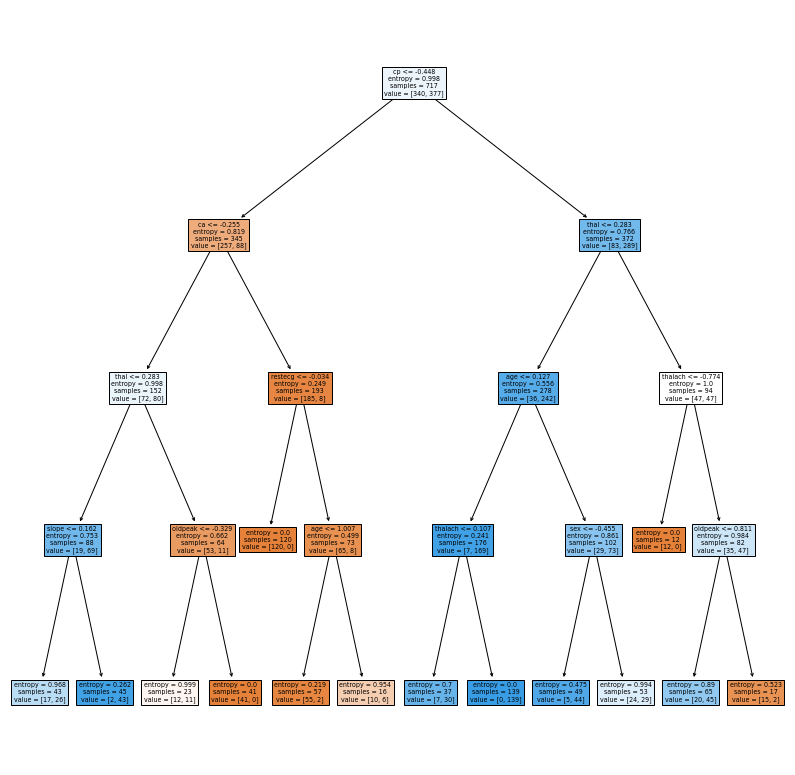

In [30]:
fig, ax = plt.subplots(figsize=(14, 14))
tree.plot_tree(classifier_entropy, ax=ax, feature_names=list(df.columns), filled=True)
plt.show()

In [31]:
y_pred_entropy = classifier_entropy.predict(X_test_normalized)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(accuracy_entropy)

0.8116883116883117


In [32]:
print(classification_report(y_test, y_pred_entropy))

              precision    recall  f1-score   support

           0       0.90      0.71      0.80       159
           1       0.75      0.92      0.83       149

    accuracy                           0.81       308
   macro avg       0.83      0.82      0.81       308
weighted avg       0.83      0.81      0.81       308

